Título: Exercise 2.1

Nombre: JM 

Fecha: 9 de diciembre del 2020

Cargar librerías

In [1]:
install.packages("deSolve")
install.packages("ggplot2")
library(deSolve)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
# Establish model 
model <- function(times,state,parms) {
  with(as.list(c(state,parms)), {

    #dhdt = Fin/A - beta*h/A
    dhdt = Fin/A - beta*sqrt(h)/A

    return(list(dhdt))
  })
}

In [13]:
# input
Fin = 0.5
# parameters 
p <- c(Fin = Fin, beta = 0.1, A = 1)

In [14]:
# initial conditions 
s <- c(h=2)

In [15]:
# integration time
t <- seq(0,100,len=100)

In [16]:
# solve ODE
out <- ode(y = s, times = t, func = model, parms = p, method = "rk4")

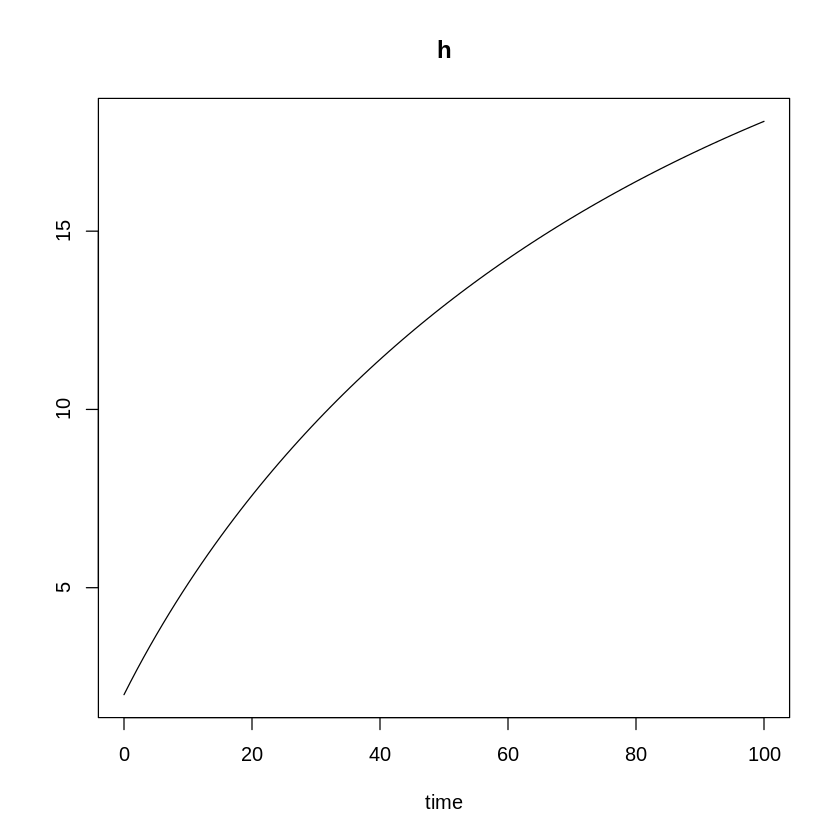

In [17]:
plot(out)

In [18]:
# change inflow
n <- length(t)
Fin <- rep(1,n)*Fin
Fin[50:70] <- 0.35

In [20]:
# vector to save state
h <- rep(1,length(t))*2

In [21]:
for (i in 1:(length(t)-1)) {

  p["Fin"] <- Fin[i+1]
  ts <- c(t[i],t[i+1])
  out <- ode(y=s,times = t,func = model, parms = p,method = "rk4")
  m <- nrow(out)

  # save state
  h[i+1] <- out[m,2]

  # update initial conditions
  s <- out[m,2]
}

In [23]:
# save results
data <- data.frame(t=t,Fin=Fin,h=h)

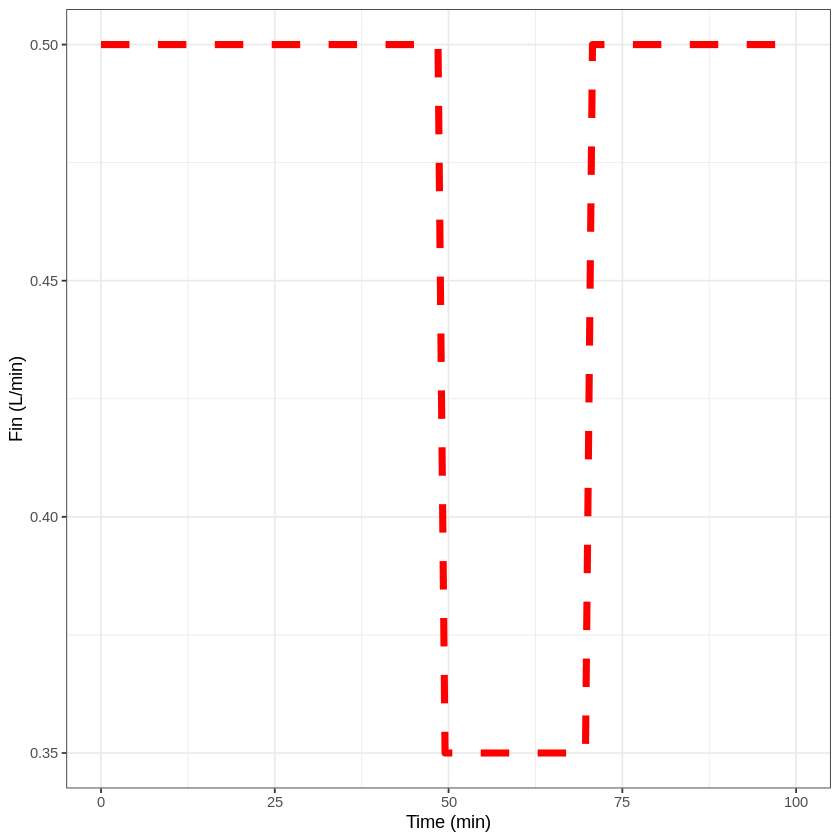

In [24]:
ggplot(data,aes(t))+
        geom_line(aes(y=Fin),lwd=2,lty=2,color="red") +
        ylab("Fin (L/min)") +
        xlab("Time (min)") +
        theme_bw()

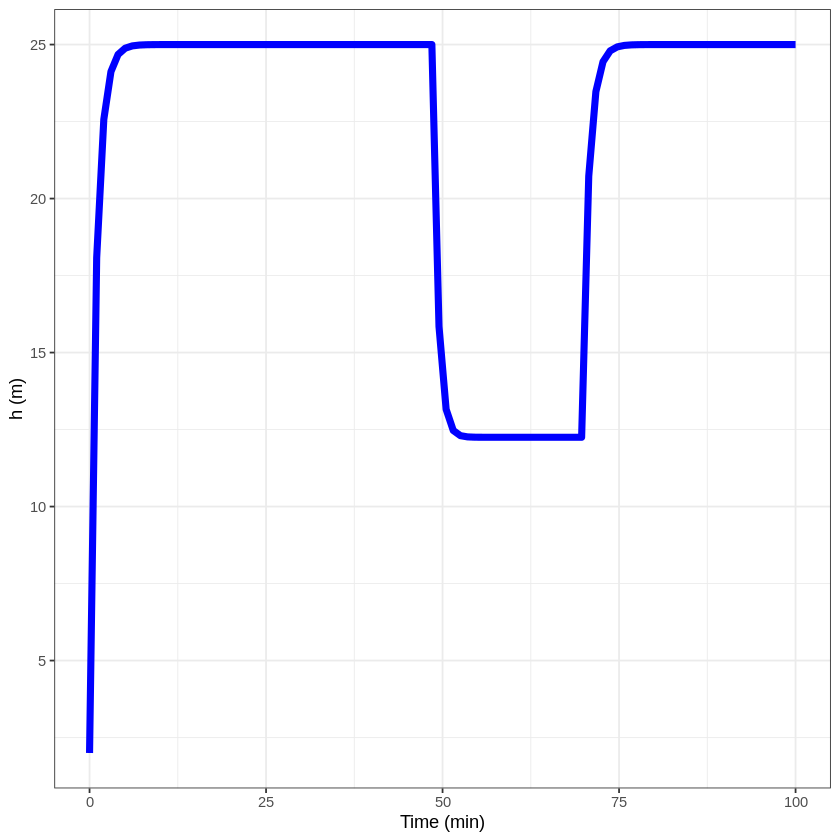

In [25]:
ggplot(data,aes(t))+
        geom_line(aes(y=h),lwd=2,lty=1,color="blue") +
        ylab("h (m)") +
        xlab("Time (min)") +
        theme_bw()